# Data mining project 22/23

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data understanding

In [2]:
df = pd.read_csv("ravdess_features.csv") # read csv file (dataset)

In [3]:
df

,modality,vocal_channel,emotion,emotional_intensity,statement,repetition,actor,sex,channels,sample_width,...,stft_min,stft_max,stft_kur,stft_skew,mean,std,min,max,kur,skew
0,audio-only,speech,fearful,normal,Dogs are sitting by the door,2nd,2.0,F,1,2,...,0.000000,1.0,-1.215025,0.403514,3.844916e-07,0.014482,-0.128632,0.138947,9.406061,0.273153
1,audio-only,speech,angry,normal,Dogs are sitting by the door,1st,16.0,F,1,2,...,0.000000,1.0,-1.384174,0.290905,-7.149491e-08,0.020417,-0.305725,0.263062,19.564187,0.292157
2,audio-only,NaN,happy,strong,Dogs are sitting by the door,2nd,16.0,F,1,2,...,0.000000,1.0,-1.242947,0.470350,2.429985e-06,0.024317,-0.137482,0.166351,4.881241,0.302659
3,audio-only,NaN,surprised,normal,Kids are talking by the door,1st,14.0,F,1,2,...,0.000000,1.0,-1.445318,0.274756,2.373929e-07,0.003561,-0.027374,0.024078,13.040259,-0.081014
4,audio-only,song,happy,strong,Dogs are sitting by the door,2nd,2.0,F,1,2,...,0.000000,1.0,-1.366742,0.318926,8.454691e-07,0.027522,-0.192169,0.242676,7.485109,0.414872
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2447,audio-only,speech,calm,strong,Kids are talking by the door,1st,23.0,M,1,2,...,0.000000,1.0,-1.075888,-0.310088,9.367040e-07,0.005260,-0.039856,0.052399,9.551363,0.759247
2448,audio-only,speech,calm,normal,Dogs are sitting by the door,1st,23.0,M,1,2,...,0.000000,1.0,-1.026071,-0.408018,4.614221e-07,0.006836,-0.064178,0.084045,22.517991,1.073633
2449,audio-only,song,sad,strong,Dogs are sitting by the door,2nd,23.0,M,1,2,...,0.000000,1.0,-1.473789,0.130310,-8.219263e-06,0.015384,-0.093079,0.097260,4.964319,-0.005821
2450,audio-only,speech,surprised,normal,Kids are talking by the door,1st,NaN,M,1,2,...,0.001565,1.0,-1.277117,-0.242668,-4.400898e-06,0.005182,-0.057556,0.052002,13.855588,-0.110966


In [4]:
df.shape # shape of dataset (rows, columns)

(2452, 38)

In [5]:
df.dtypes

modality                object
vocal_channel           object
emotion                 object
emotional_intensity     object
statement               object
repetition              object
actor                  float64
sex                     object
channels                 int64
sample_width             int64
frame_rate               int64
frame_width              int64
length_ms                int64
frame_count            float64
intensity              float64
zero_crossings_sum       int64
mfcc_mean              float64
mfcc_std               float64
mfcc_min               float64
mfcc_max               float64
sc_mean                float64
sc_std                 float64
sc_min                 float64
sc_max                 float64
sc_kur                 float64
sc_skew                float64
stft_mean              float64
stft_std               float64
stft_min               float64
stft_max               float64
stft_kur               float64
stft_skew              float64
mean    

In [6]:
df.describe().round(2) # some descriptive statistics

,actor,channels,sample_width,frame_rate,frame_width,length_ms,frame_count,intensity,zero_crossings_sum,mfcc_mean,...,stft_min,stft_max,stft_kur,stft_skew,mean,std,min,max,kur,skew
count,1326.00,2452.00,2452.0,2452.0,2452.0,2452.00,2452.00,1636.00,2452.00,2452.00,...,2452.00,2452.0,2452.00,2452.00,2452.0,2452.00,2452.00,2452.00,2452.00,2452.00
mean,12.58,1.00,2.0,48000.0,2.0,4092.15,193587.19,-37.63,12885.31,-28.77,...,0.00,1.0,-1.25,0.11,0.0,0.02,-0.16,0.18,11.20,-0.05
std,6.92,0.05,0.0,0.0,0.1,598.32,36825.37,8.45,3665.32,4.46,...,0.00,0.0,0.21,0.33,0.0,0.02,0.18,0.20,6.61,0.45
min,1.00,1.00,2.0,48000.0,2.0,2936.00,-1.00,-63.86,4721.00,-43.81,...,0.00,1.0,-1.67,-0.99,-0.0,0.00,-1.00,0.00,1.76,-2.36
25%,7.00,1.00,2.0,48000.0,2.0,3604.00,172972.00,-43.54,10362.50,-31.83,...,0.00,1.0,-1.39,-0.09,-0.0,0.01,-0.20,0.06,6.52,-0.34
50%,13.00,1.00,2.0,48000.0,2.0,4004.00,190591.00,-37.07,12383.50,-28.68,...,0.00,1.0,-1.29,0.13,-0.0,0.01,-0.10,0.11,9.83,0.00
75%,19.00,1.00,2.0,48000.0,2.0,4538.00,217817.00,-31.59,14966.00,-25.55,...,0.00,1.0,-1.15,0.34,0.0,0.03,-0.05,0.22,14.09,0.26
max,24.00,2.00,2.0,48000.0,4.0,6373.00,305906.00,-16.35,30153.00,-15.49,...,0.04,1.0,0.79,1.47,0.0,0.15,-0.01,1.00,59.09,1.80


In [7]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,2442,2443,2444,2445,2446,2447,2448,2449,2450,2451
modality,audio-only,audio-only,audio-only,audio-only,audio-only,audio-only,audio-only,audio-only,audio-only,audio-only,...,audio-only,audio-only,audio-only,audio-only,audio-only,audio-only,audio-only,audio-only,audio-only,audio-only
vocal_channel,speech,speech,NaN,NaN,song,speech,speech,speech,speech,song,...,song,speech,speech,speech,NaN,speech,speech,song,speech,NaN
emotion,fearful,angry,happy,surprised,happy,fearful,angry,neutral,calm,sad,...,sad,calm,neutral,surprised,sad,calm,calm,sad,surprised,neutral
emotional_intensity,normal,normal,strong,normal,strong,normal,normal,normal,normal,strong,...,strong,normal,normal,strong,normal,strong,normal,strong,normal,normal
statement,Dogs are sitting by the door,Dogs are sitting by the door,Dogs are sitting by the door,Kids are talking by the door,Dogs are sitting by the door,Dogs are sitting by the door,Dogs are sitting by the door,Dogs are sitting by the door,Dogs are sitting by the door,Dogs are sitting by the door,...,Kids are talking by the door,Kids are talking by the door,Kids are talking by the door,Dogs are sitting by the door,Kids are talking by the door,Kids are talking by the door,Dogs are sitting by the door,Dogs are sitting by the door,Kids are talking by the door,Dogs are sitting by the door
repetition,2nd,1st,2nd,1st,2nd,2nd,1st,2nd,1st,2nd,...,2nd,1st,2nd,1st,2nd,1st,1st,2nd,1st,2nd
actor,2.0,16.0,16.0,14.0,2.0,NaN,2.0,NaN,12.0,12.0,...,NaN,NaN,NaN,NaN,23.0,23.0,23.0,23.0,NaN,23.0
sex,F,F,F,F,F,F,F,F,F,F,...,M,M,M,M,M,M,M,M,M,M
channels,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
sample_width,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2


### MFCC understanding

In [48]:
max_mfccMean = df["mfcc_mean"].max()
min_mfccMean = df["mfcc_mean"].min()
max_mfccStd = df["mfcc_std"].max()
min_mfccStd = df["mfcc_std"].min()
min_mfccMin = df["mfcc_min"].min()
max_mfccMax = df["mfcc_max"].max()
print("Max value of mfcc_mean is: ", round(max_mfccMean, 2))
print("Min value of mfcc_mean is: ", round(min_mfccMean, 2))
print("Max value of mfcc_std is: ", round(max_mfccStd, 2))
print("Min value of mfcc_std is: ", round(min_mfccStd, 2))
print("Min value of mfcc_min is: ", round(min_mfccMin, 2))
print("Max value of mfcc_max is: ", round(max_mfccMax, 2))

Max value of mfcc_mean is:  -15.49
Min value of mfcc_mean is:  -43.81
Max value of mfcc_std is:  195.94
Min value of mfcc_std is:  83.62
Min value of mfcc_min is:  -1085.48
Max value of mfcc_max is:  280.17


### SC understanding

In [47]:
max_scMean = df["sc_mean"].max()
min_scMean = df["sc_mean"].min()
max_scStd = df["sc_std"].max()
min_scStd = df["sc_std"].min()
min_scMin = df["sc_min"].min()
max_scMax = df["sc_max"].max()
max_scKur = df["sc_kur"].max()
min_scKur = df["sc_kur"].min()
max_scSkew = df["sc_skew"].max()
min_scSkew = df["sc_skew"].min()
print("Max value of sc_mean is: ", round(max_scMean, 2))
print("Min value of sc_mean is: ", round(min_scMean, 2))
print("Max value of sc_std is: ", round(max_scStd, 2))
print("Min value of sc_std is: ", round(min_scStd, 2))
print("Min value of sc_min is: ", round(min_scMin, 2))
print("Max value of sc_max is: ", round(max_scMax, 2))
print("Max value of sc_kur is: ", round(max_scKur, 2))
print("Min value of sc_kur is: ", round(min_scKur, 2))
print("Max value of sc_skew is: ", round(max_scSkew, 2))
print("Min value of sc_skew is: ", round(min_scSkew, 2))

Max value of sc_mean is:  7655.34
Min value of sc_mean is:  2360.88
Max value of sc_std is:  4819.78
Min value of sc_std is:  1491.34
Min value of sc_min is:  0.0
Max value of sc_max is:  17477.54
Max value of sc_kur is:  3.66
Min value of sc_kur is:  -1.8
Max value of sc_skew is:  1.83
Min value of sc_skew is:  -0.51


### STFT chromagram understanding

In [46]:
max_stftMean = df["stft_mean"].max()
min_stftMean = df["stft_mean"].min()
max_stftStd = df["stft_std"].max()
min_stftStd = df["stft_std"].min()
min_stftMin = df["stft_min"].min()
max_stftMax = df["stft_max"].max()
max_stftKur = df["stft_kur"].max()
min_stftKur = df["stft_kur"].min()
max_stftSkew = df["stft_skew"].max()
min_stftSkew = df["stft_skew"].min()
print("Max value of stft_mean is: ", round(max_stftMean, 2))
print("Min value of stft_mean is: ", round(min_stftMean, 2))
print("Max value of stft_std is: ", round(max_stftStd, 2))
print("Min value of stft_std is: ", round(min_stftStd, 2))
print("Min value of stft_min is: ", round(min_stftMin, 2))
print("Max value of stft_max is: ", round(max_stftMax, 2))
print("Max value of stft_kur is: ", round(max_stftKur, 2))
print("Min value of stft_kur is: ", round(min_stftKur, 2))
print("Max value of stft_skew is: ", round(max_stftSkew, 2))
print("Min value of stft_skew is: ", round(min_stftSkew, 2))

Max value of stft_mean is:  0.72
Min value of stft_mean is:  0.21
Max value of stft_std is:  0.39
Min value of stft_std is:  0.21
Min value of stft_min is:  0.0
Max value of stft_max is:  1.0
Max value of stft_kur is:  0.79
Min value of stft_kur is:  -1.67
Max value of stft_skew is:  1.47
Min value of stft_skew is:  -0.99


## Checking semantic accuracy

In [87]:
df["modality"].value_counts()

audio-only    2452
Name: modality, dtype: int64

In [88]:
df["vocal_channel"].value_counts()

speech    1335
song       921
Name: vocal_channel, dtype: int64

In [89]:
df["emotion"].value_counts()

fearful      376
angry        376
happy        376
calm         376
sad          376
surprised    192
disgust      192
neutral      188
Name: emotion, dtype: int64

In [90]:
df["emotional_intensity"].value_counts()

normal    1320
strong    1132
Name: emotional_intensity, dtype: int64

In [91]:
df["statement"].value_counts()

Dogs are sitting by the door    1226
Kids are talking by the door    1226
Name: statement, dtype: int64

In [92]:
df["repetition"].value_counts()

2nd    1226
1st    1226
Name: repetition, dtype: int64

In [93]:
df["sex"].value_counts()

M    1248
F    1204
Name: sex, dtype: int64

The nominal/categorical columns values seems to be semantically accurate.

## NaN values

In [31]:
df.isna().sum()

modality                  0
vocal_channel           196
emotion                   0
emotional_intensity       0
statement                 0
repetition                0
actor                  1126
sex                       0
channels                  0
sample_width              0
frame_rate                0
frame_width               0
length_ms                 0
frame_count               0
intensity               816
zero_crossings_sum        0
mfcc_mean                 0
mfcc_std                  0
mfcc_min                  0
mfcc_max                  0
sc_mean                   0
sc_std                    0
sc_min                    0
sc_max                    0
sc_kur                    0
sc_skew                   0
stft_mean                 0
stft_std                  0
stft_min                  0
stft_max                  0
stft_kur                  0
stft_skew                 0
mean                      0
std                       0
min                       0
max                 

## Charts and relations

In [15]:
emotion_sex = pd.crosstab(df["sex"], df["emotion"])
emotion_sex

emotion,angry,calm,disgust,fearful,happy,neutral,sad,surprised
sex,,,,,,,,
F,184,184,96,184,184,92,184,96
M,192,192,96,192,192,96,192,96


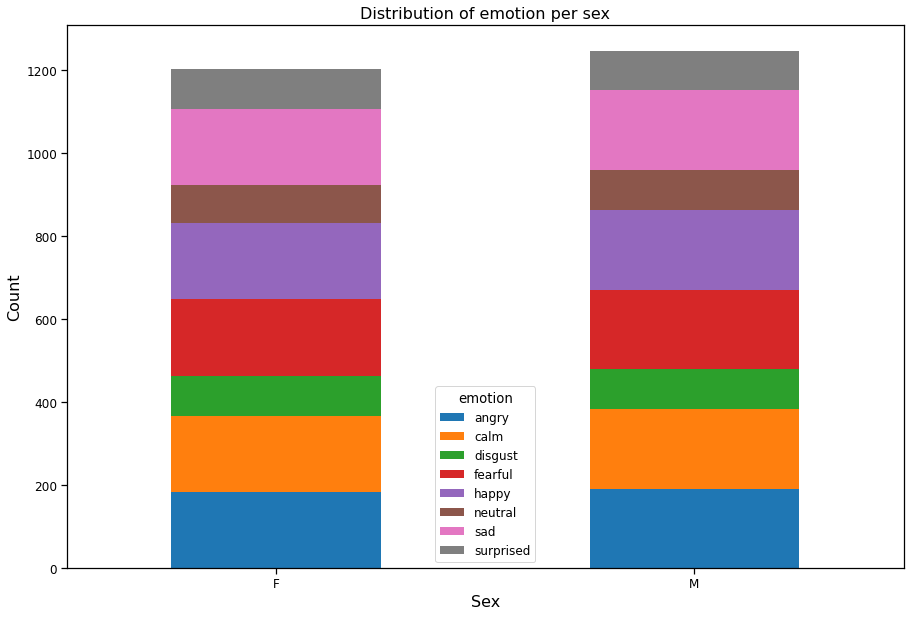

In [16]:
sns.set_context("notebook", font_scale = 1.1, rc = {"font.size": 16, "axes.titlesize": 16, "axes.labelsize": 16}) # set the
# context of chart, in this case this is a notebook, and some other size and scale
plt.rcParams["figure.figsize"] = [15, 10] # it configures the size of chart (x and y axes)

# stacked chart of vocal channel per sex
emotion_sex.plot(kind="bar", stacked = True)
plt.title("Distribution of emotion per sex")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.xticks(rotation = 0)
#plt.savefig("stacked_vocalChannel.png") # it saves the chart as .png image
plt.show()

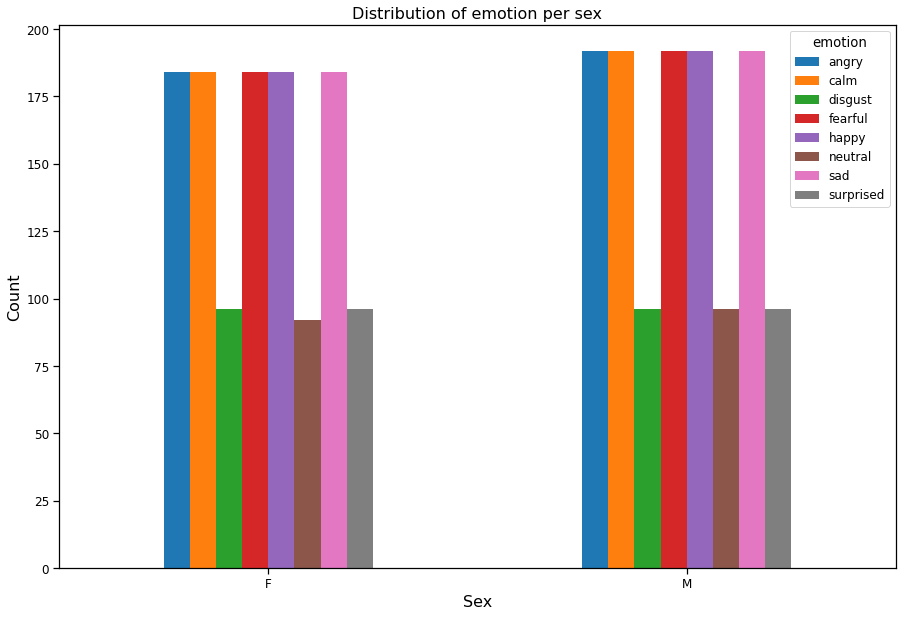

In [17]:
sns.set_context("notebook", font_scale = 1.1, rc = {"font.size": 16, "axes.titlesize": 16, "axes.labelsize": 16}) # set the
# context of chart, in this case this is a notebook, and some other size and scale
plt.rcParams["figure.figsize"] = [15, 10] # it configures the size of chart (x and y axes)

# stacked chart of vocal channel per sex
emotion_sex.plot(kind="bar", stacked = False)
plt.title("Distribution of emotion per sex")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.xticks(rotation = 0)
#plt.savefig("stacked_vocalChannel.png") # it saves the chart as .png image
plt.show()

In [49]:
vocal_channel = pd.crosstab(df["sex"], df["vocal_channel"])
vocal_channel

vocal_channel,song,speech
sex,,
F,434,671
M,487,664


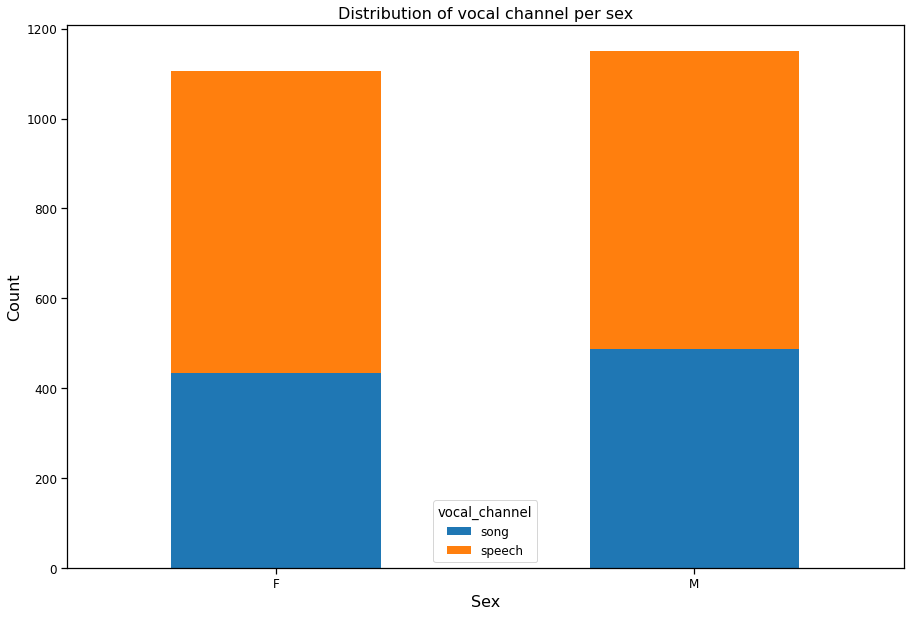

In [50]:
# stacked chart of vocal channel per sex
vocal_channel.plot(kind="bar", stacked = True)
plt.title("Distribution of vocal channel per sex")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.xticks(rotation = 0)
#plt.savefig("stacked_vocalChannel.png") # it saves the chart as .png image
plt.show()

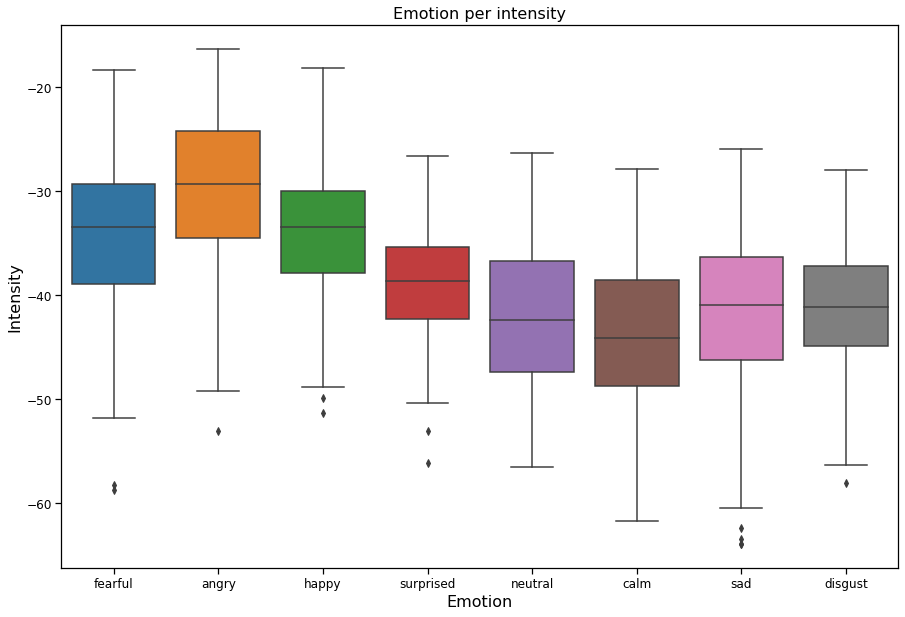

In [20]:
sns.boxplot(x = "emotion", y = "intensity", data = df)
plt.title("Emotion per intensity")
plt.xlabel("Emotion")
plt.ylabel("Intensity")
#plt.savefig("boxplot_emotionIntensity.png")
plt.show()

In [21]:
sizes = df["emotion"].value_counts()
labels = df["emotion"].unique()

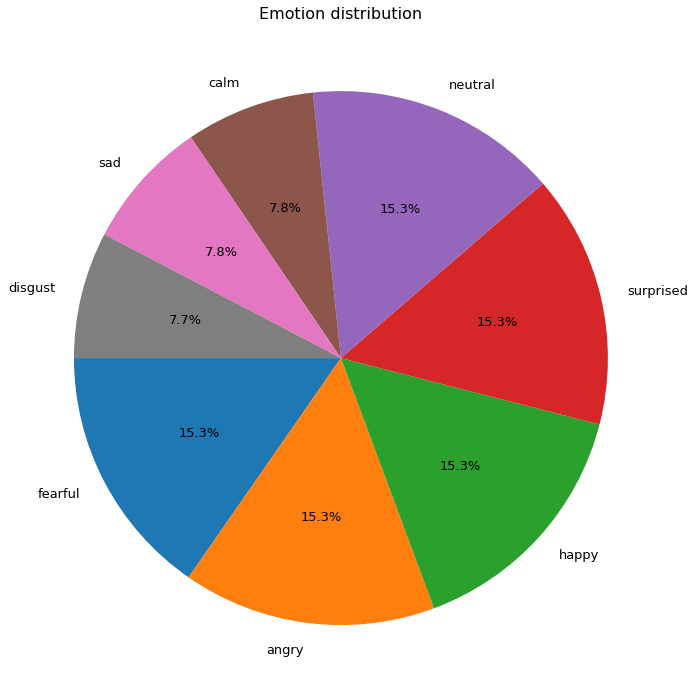

In [22]:
plt.pie(sizes, labels = labels, autopct = '%1.1f%%', shadow = False, startangle = 180, textprops = {'fontsize': 13})
plt.title("Emotion distribution")
plt.tight_layout() # it fixes padding around the chart
#plt.savefig("pie_emotion.png")
plt.show()

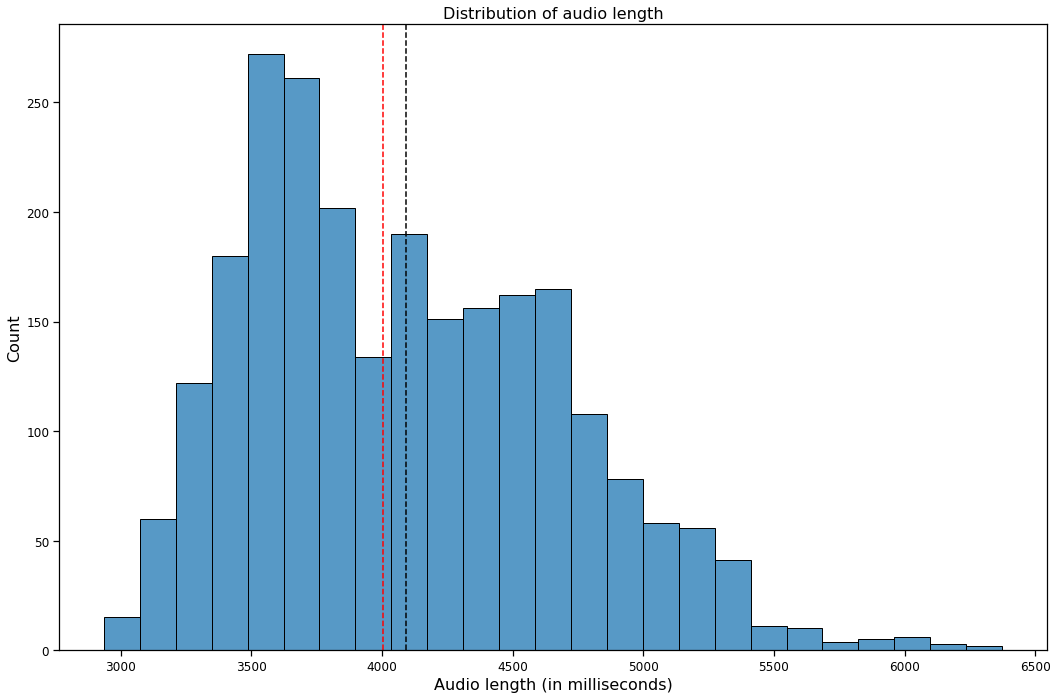

In [23]:
sns.histplot(df["length_ms"])
plt.title("Distribution of audio length")
plt.xlabel("Audio length (in milliseconds)")
plt.ylabel("Count")
plt.axvline(df['length_ms'].mean(), color = "k", linestyle = "--") # mean (black dotted line)
plt.axvline(df['length_ms'].median(), color = "r", linestyle = "--") # median (red dotted line)
plt.tight_layout()
#plt.savefig("histplot_lenghtms.png")
plt.show()

In [62]:
emoInt_sex = pd.crosstab(df["sex"], df["emotional_intensity"])
emoInt_sex

emotional_intensity,normal,strong
sex,,
F,648,556
M,672,576


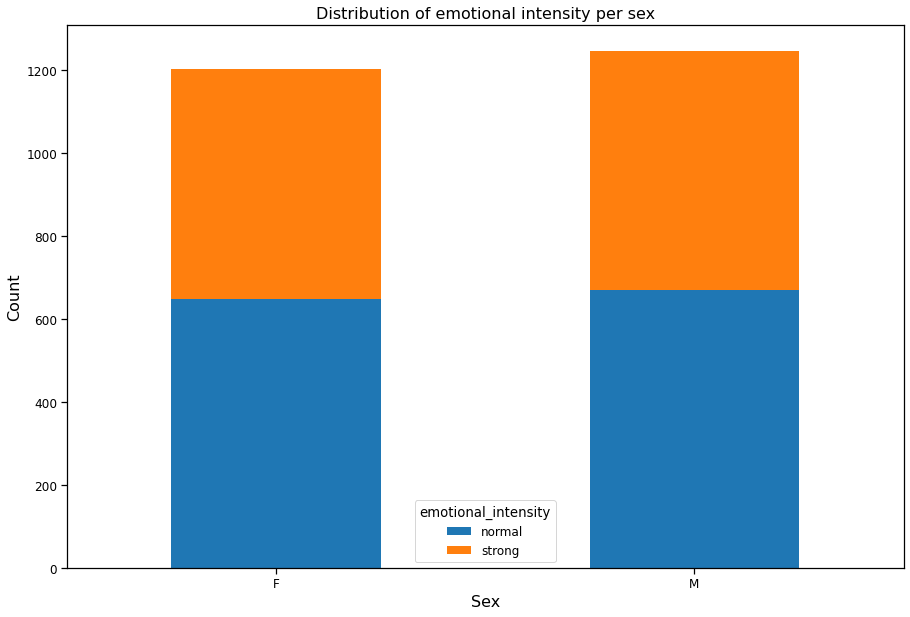

In [67]:
# stacked chart of emotional intensity per sex
emoInt_sex.plot(kind="bar", stacked = True)
plt.title("Distribution of emotional intensity per sex")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.xticks(rotation = 0)
#plt.savefig("stacked_vocalChannel.png") # it saves the chart as .png image
plt.show()

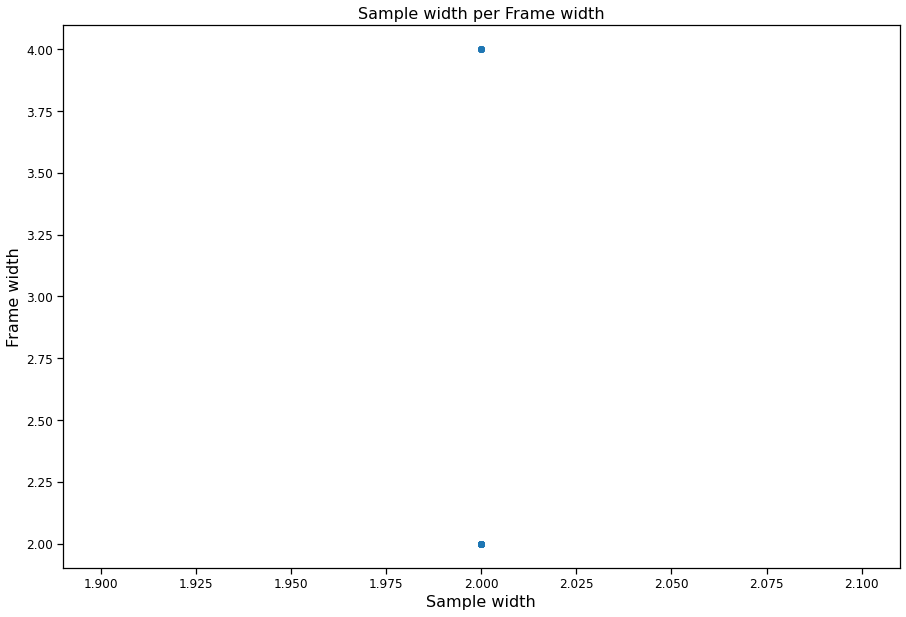

In [55]:
sns.regplot(x = "sample_width", y = "frame_width", fit_reg = False, data = df)
plt.title("Sample width per Frame width")
plt.xlabel("Sample width")
plt.ylabel("Frame width")
#plt.savefig("scatter_sw-fw.png")
plt.show()

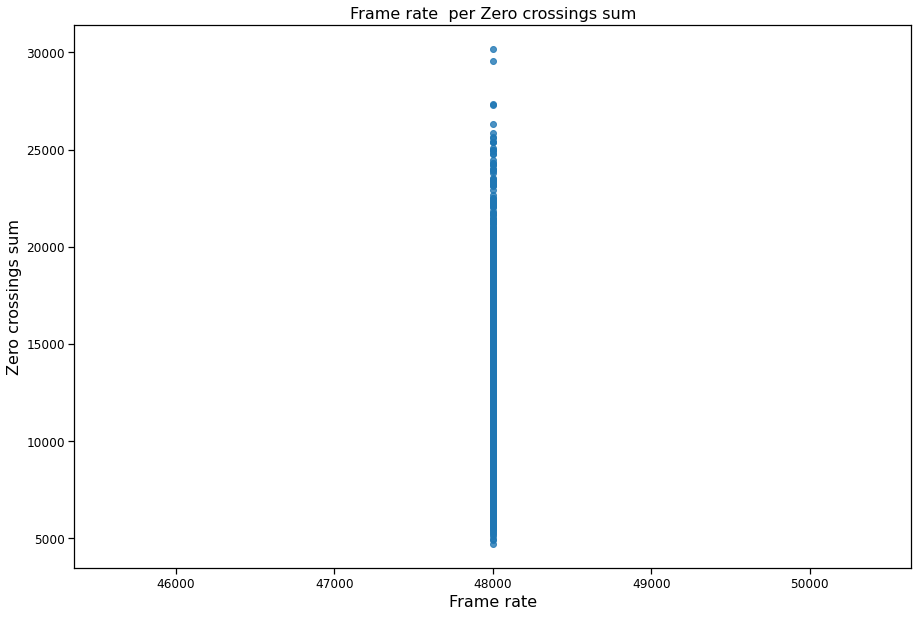

In [56]:
sns.regplot(x = "frame_rate", y = "zero_crossings_sum", fit_reg = False, data = df)
plt.title("Frame rate per Zero crossings sum")
plt.xlabel("Frame rate")
plt.ylabel("Zero crossings sum")
#plt.savefig("scatter_fr-zcs.png")
plt.show()

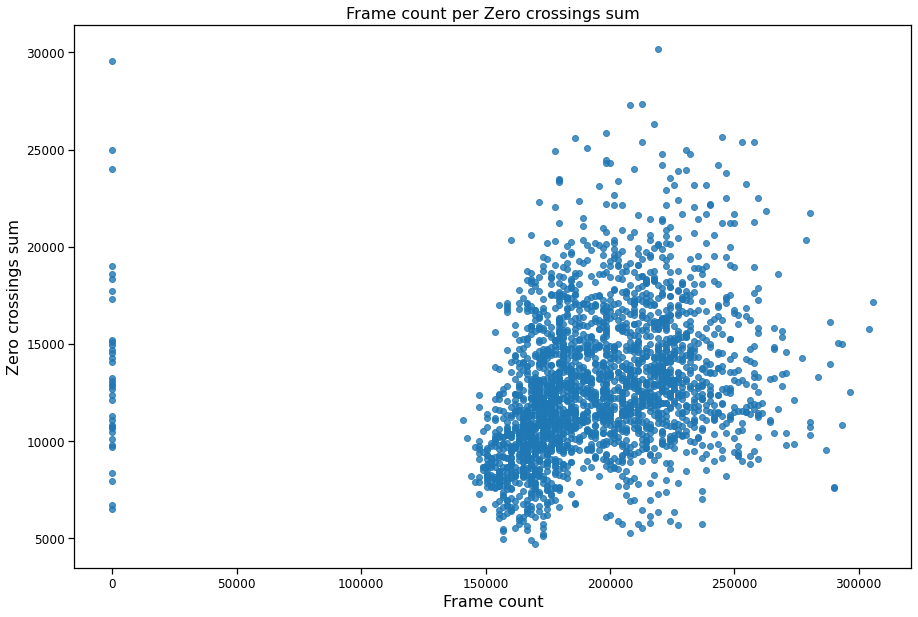

In [59]:
sns.regplot(x = "frame_count", y = "zero_crossings_sum", fit_reg = False, data = df)
plt.title("Frame count per Zero crossings sum")
plt.xlabel("Frame count")
plt.ylabel("Zero crossings sum")
#plt.savefig("scatter_fc-zcs.png")
plt.show()

Here we can notice a missing frame count or uncorrect entries, because there are some 0 values on frame count axis.

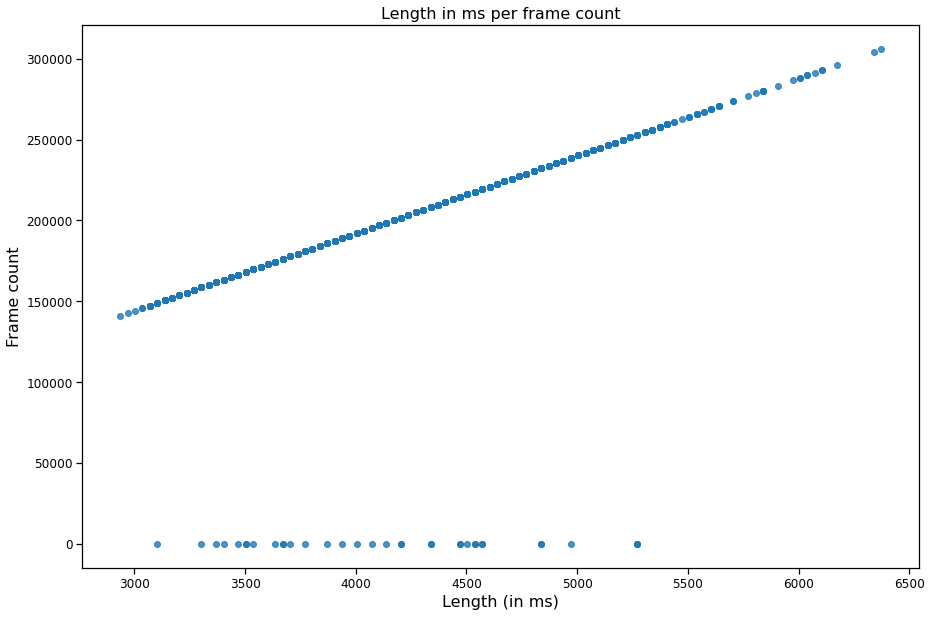

In [61]:
sns.regplot(x = "length_ms", y = "frame_count", fit_reg = False, data = df)
plt.title("Length in ms per frame count")
plt.xlabel("Length (in ms)")
plt.ylabel("Frame count")
#plt.savefig("scatter_lms-fc.png")
plt.show()

Also here we can see there are some uncorrect or missing values on frame count axis.

In [66]:
EI_stat = pd.crosstab(df["emotional_intensity"], df["statement"])
EI_stat

statement,Dogs are sitting by the door,Kids are talking by the door
emotional_intensity,,
normal,660,660
strong,566,566


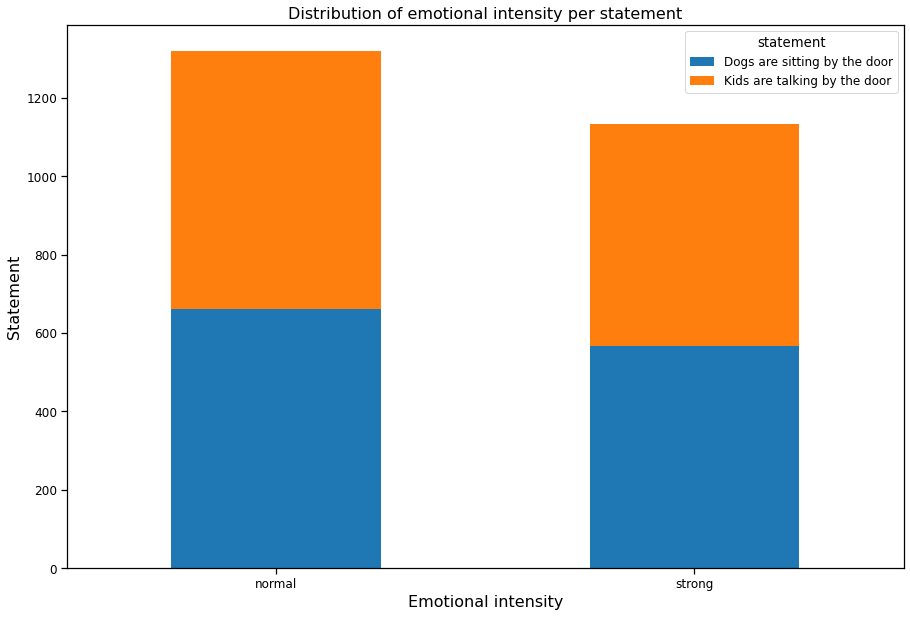

In [71]:
EI_stat.plot(kind="bar", stacked = True)
plt.title("Distribution of emotional intensity per statement")
plt.xlabel("Emotional intensity")
plt.ylabel("Statement")
plt.xticks(rotation = 0)
#plt.savefig("stacked_EI-stat.png")
plt.show()

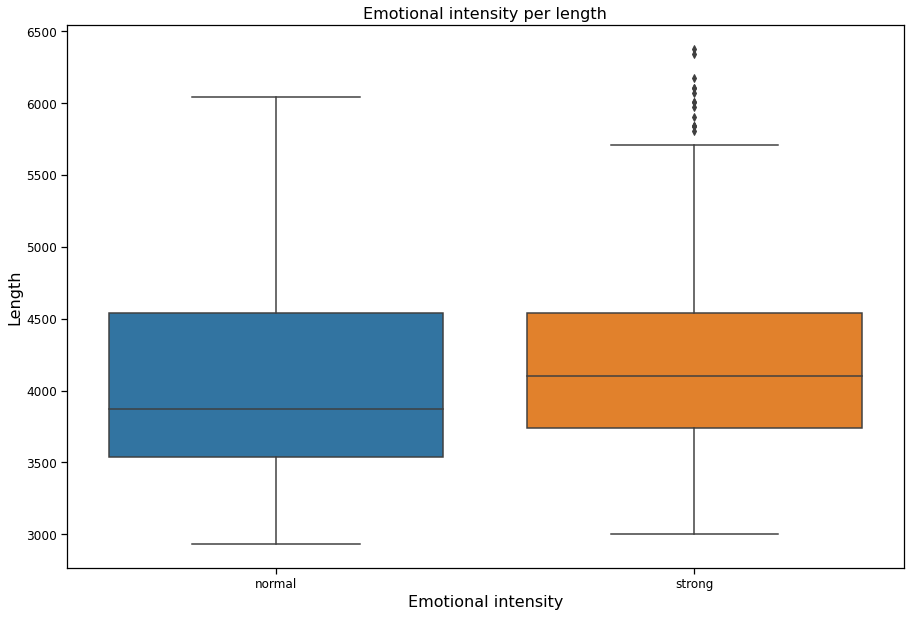

In [83]:
sns.boxplot(x = "emotional_intensity", y = "length_ms", data = df)
plt.title("Emotional intensity per length")
plt.xlabel("Emotional intensity")
plt.ylabel("Length")
#plt.savefig("boxplot_EI-length.png")
plt.show()

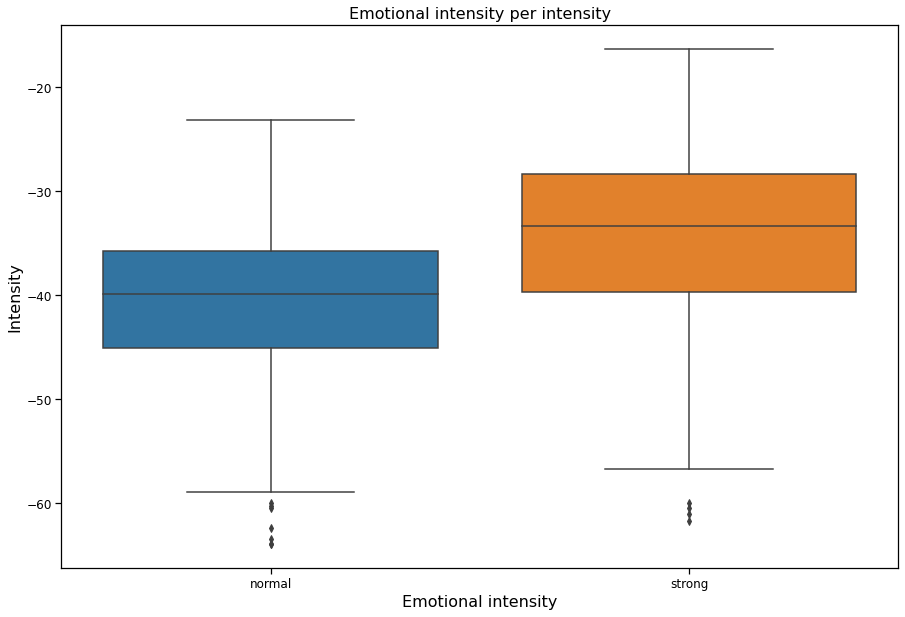

In [85]:
sns.boxplot(x = "emotional_intensity", y = "intensity", data = df)
plt.title("Emotional intensity per intensity")
plt.xlabel("Emotional intensity")
plt.ylabel("Intensity")
#plt.savefig("boxplot_EI-intensity.png")
plt.show()

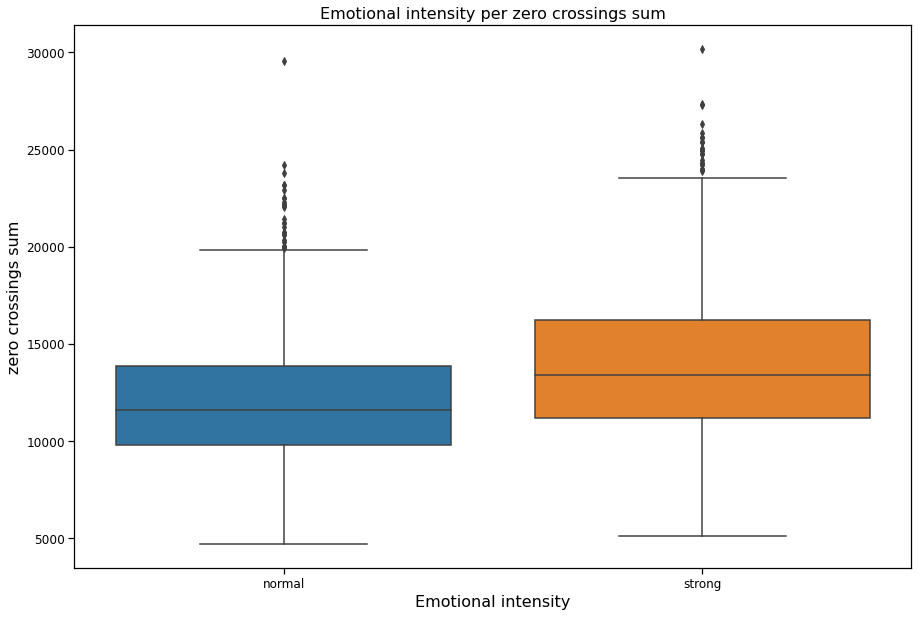

In [86]:
sns.boxplot(x = "emotional_intensity", y = "zero_crossings_sum", data = df)
plt.title("Emotional intensity per zero crossings sum")
plt.xlabel("Emotional intensity")
plt.ylabel("zero crossings sum")
#plt.savefig("boxplot_EI-ZCS.png")
plt.show()